In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.append(os.getcwd() + "/../tests/hmm")
sys.path.append(os.getcwd() + "/../hepaccelerate")

In [66]:
import copy

In [120]:
import hepaccelerate
import pars, plotting
from pars import cross_sections

from plotting import load_hist, make_pdf_plot, plot_hist_step, midpoints, histstep
plotting.plt = plt

In [38]:
mc_samples_combine_H = [
    "ggh",
    "vbf",
    #"wz_1l1nu2q",
    "wz_3lnu",
    "ww_2l2nu", "wz_2l2q", "zz",
    "ewk_lljj_mll105_160",
    #"st_top",
    #"st_t_antitop",
    "st_tw_top",
    "st_tw_antitop",
    "ttjets_sl", "ttjets_dl",
    "dy_m105_160_amc", "dy_m105_160_vbf_amc",
]

mc_samples_combine_Z = [
    "ggh",
    "vbf",
    #"wz_1l1nu2q",
    "wz_3lnu", 
    "ww_2l2nu", "wz_2l2q", "zz",
    "ewk_lljj_mll105_160",
    #"st_top",
    #"st_t_antitop",
    "st_tw_top",
    "st_tw_antitop",
    "ttjets_sl", "ttjets_dl",
    "dy_0j", "dy_1j", "dy_2j",
]
mc_samples_load = list(set(mc_samples_combine_H + mc_samples_combine_Z))

In [39]:
dd = "../out2/baseline/"
era = "2018"
res = {}
res["data"] = json.load(open(dd + "/data_{0}.json".format(era)))
for mc_samp in mc_samples_load:
    res[mc_samp] = json.load(open(dd + "/{0}_{1}.json".format(mc_samp, era)))

In [40]:
genweights = {}
weight_xs = {}
#in inverse picobarns
int_lumi = res["data"]["baseline"]["int_lumi"]
for mc_samp in mc_samples_load:
    genweights[mc_samp] = res[mc_samp]["genEventSumw"]
    weight_xs[mc_samp] = cross_sections[mc_samp] * int_lumi / genweights[mc_samp]


In [41]:
histnames = [h for h in res["data"]["baseline"].keys() if h.startswith("hist__")]

In [42]:
sorted(histnames)

['hist__dimuon__inv_mass',
 'hist__dimuon__leading_muon_eta',
 'hist__dimuon__leading_muon_pt',
 'hist__dimuon__npvs',
 'hist__dimuon__subleading_muon_eta',
 'hist__dimuon__subleading_muon_pt',
 'hist__dimuon_invmass_h_peak__dijet_inv_mass',
 'hist__dimuon_invmass_h_peak__inv_mass',
 'hist__dimuon_invmass_h_peak__numjet',
 'hist__dimuon_invmass_h_peak_cat5__Higgs_eta',
 'hist__dimuon_invmass_h_peak_cat5__Higgs_mass',
 'hist__dimuon_invmass_h_peak_cat5__Higgs_pt',
 'hist__dimuon_invmass_h_peak_cat5__M_jj',
 'hist__dimuon_invmass_h_peak_cat5__M_mmjj',
 'hist__dimuon_invmass_h_peak_cat5__Zep',
 'hist__dimuon_invmass_h_peak_cat5__cthetaCS',
 'hist__dimuon_invmass_h_peak_cat5__dEta_jj',
 'hist__dimuon_invmass_h_peak_cat5__dEtamm',
 'hist__dimuon_invmass_h_peak_cat5__dPhimm',
 'hist__dimuon_invmass_h_peak_cat5__dRmax_mj',
 'hist__dimuon_invmass_h_peak_cat5__dRmax_mmj',
 'hist__dimuon_invmass_h_peak_cat5__dRmin_mj',
 'hist__dimuon_invmass_h_peak_cat5__dRmin_mmj',
 'hist__dimuon_invmass_h_peak

In [308]:
catnames = {
    "dimuon_invmass_z_peak_cat5": "dimuons, Z region, cat 5",
    "dimuon_invmass_h_peak_cat5": "dimuons, H SR, cat 5",
    "dimuon_invmass_h_sideband_cat5": "dimuons, H SB, cat 5",

    "dimuon_invmass_z_peak": "dimuons, Z region",
    "dimuon_invmass_h_peak": "dimuons, H SR",
    "dimuon_invmass_h_sideband": "dimuons, H SB",
}
varnames = {
    "subleadingJet_pt": "subleading jet $p_T$ [GeV]",
    "subleadingJet_eta": "subleading jet $\eta$",
    "leadingJet_pt": "subleading jet $p_T$ [GeV]",
    "leadingJet_eta": "subleading jet $\eta$",
}

analysis_names = {
    "baseline": "JEC V8",
    "redo_jec_V16": "JEC V16"
}
         

In [311]:
def plot_hist_ratio(hists_mc, hist_data,
        total_err_stat=None,
        total_err_stat_syst=None,
        figure=None):
    if not figure:
        figure = plt.figure(figsize=(5,5), dpi=100)

    ax1 = plt.axes([0.0, 0.23, 1.0, 0.8])
       
    hmc_tot = np.zeros_like(hist_data.contents)
    hmc_tot2 = np.zeros_like(hist_data.contents)
    for h in hists_mc:
        plot_hist_step(ax1, h.edges, hmc_tot + h.contents,
            np.sqrt(hmc_tot2 + h.contents_w2),
            kwargs_step={"label": getattr(h, "label", None)}
        )
        hmc_tot += h.contents
        hmc_tot2 += h.contents_w2
#    plot_hist_step(h["edges"], hmc_tot, np.sqrt(hmc_tot2), kwargs_step={"color": "gray", "label": None})
    ax1.errorbar(
        midpoints(hist_data.edges), hist_data.contents,
        np.sqrt(hist_data.contents_w2), marker=".", lw=0,
        elinewidth=1.0, color="black", ms=3, label=getattr(hist_data, "label", None))
    
    if not (total_err_stat_syst is None):
        histstep(ax1, hist_data.edges, hmc_tot + total_err_stat_syst, color="blue", linewidth=1)
        histstep(ax1, hist_data.edges, hmc_tot - total_err_stat_syst, color="blue", linewidth=1)
    
    if not (total_err_stat is None):
        histstep(ax1, hist_data.edges, hmc_tot + total_err_stat, color="black", linewidth=1, linestyle="--")
        histstep(ax1, hist_data.edges, hmc_tot - total_err_stat, color="black", linewidth=1, linestyle="--")

        
    ax1.set_yscale("log")
    ax1.set_ylim(1e-2, 100*np.max(hist_data.contents))
    
    #ax1.get_yticklabels()[-1].remove()
    
    ax2 = plt.axes([0.0, 0.0, 1.0, 0.16], sharex=ax1)

    ratio = hist_data.contents / hmc_tot
    ratio_err = np.sqrt(hist_data.contents_w2) /hmc_tot
    ratio[np.isnan(ratio)] = 0

    plt.errorbar(midpoints(hist_data.edges), ratio, ratio_err, marker=".", lw=0, elinewidth=1, ms=3, color="black")

    if not (total_err_stat_syst is None):
        ratio_up = (hmc_tot + total_err_stat_syst) / hmc_tot
        ratio_down = (hmc_tot - total_err_stat_syst) / hmc_tot
        ratio_down[np.isnan(ratio_down)] = 1
        ratio_down[np.isnan(ratio_up)] = 1
        histstep(ax2, hist_data.edges, ratio_up, color="blue", linewidth=1, linestyle="--")
        histstep(ax2, hist_data.edges, ratio_down, color="blue", linewidth=1, linestyle="--")

    if not (total_err_stat is None):
        ratio_up = (hmc_tot + total_err_stat) / hmc_tot
        ratio_down = (hmc_tot - total_err_stat) / hmc_tot
        ratio_down[np.isnan(ratio_down)] = 1
        ratio_down[np.isnan(ratio_up)] = 1
        histstep(ax2, hist_data.edges, ratio_up, color="gray", linewidth=1, linestyle="--")
        histstep(ax2, hist_data.edges, ratio_down, color="gray", linewidth=1, linestyle="--")

                
    plt.ylim(0.5, 1.5)
    plt.axhline(1.0, color="black")
    
    return ax1, ax2

def make_pdf_plot(args):
    res, hd, mc_samples, analysis, var, weight, weight_xs, int_lumi, outdir, datataking_year = args

    hist_template = copy.deepcopy(hd)
    hist_template.contents[:] = 0
    hist_template.contents_w2[:] = 0
    
    uncertainties = ["jes", "puWeight"]
    
    hmc = []
    
    for mc_samp in mc_samples:
        h = load_hist(res[mc_samp][analysis][var][weight])
        h = h * weight_xs[mc_samp]
        h.label = "{0} ({1:.1E})".format(mc_samp, np.sum(h.contents))
                
        hmc += [h]
    
    htot_nominal = sum(hmc, hist_template)
    htot_variated = {}
    hdelta_quadrature = np.zeros_like(hist_template.contents)
    
    for sdir in ["__up", "__down"]:
        for unc in uncertainties:
            if (unc + sdir) in res[mc_samp][analysis][var]:
                htot_variated[unc + sdir] = sum([
                    load_hist(res[mc_samp][analysis][var][unc + sdir])* weight_xs[mc_samp] for mc_samp in mc_samples
                ], hist_template)
                hdelta_quadrature += (htot_nominal.contents - htot_variated[unc+sdir].contents)**2
            
    hdelta_quadrature_stat = np.sqrt(htot_nominal.contents_w2)
    hdelta_quadrature_stat_syst = np.sqrt(hdelta_quadrature_stat**2 + hdelta_quadrature)
    hd.label = "data ({0:.1E})".format(np.sum(hd.contents))

    if var == "hist_inv_mass_d":
        mask_inv_mass(hd)
    #    hd.contents[0] = 0
    #    hd.contents_w2[0] = 0

    plt.figure(figsize=(4,4))
    a1, a2 = plot_hist_ratio(hmc, hd,
        total_err_stat=hdelta_quadrature_stat, total_err_stat_syst=hdelta_quadrature_stat_syst)
    a2.grid(which="both", linewidth=0.5)
    # Ratio axis ticks
    ts = a2.set_yticks([0.5, 1.0, 1.5], minor=False)
    ts = a2.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5], minor=True)

    #a2.set_yticks(np.linspace(0.5,1.5, ))
    if var.startswith("hist_numjet"):
        a1.set_xticks(hd["edges"])

    a1.text(0.015,0.99, r"CMS internal, $L = {0:.2f}\ fb^{{-1}}$ ({1})".format(
        int_lumi/1000.0, datataking_year) + 
        "\nd/m={0:.2f}".format(np.sum(hd.contents)/np.sum(htot_nominal.contents)) + 
        ", wd={0:.2E}".format(wasserstein_distance(htot_nominal.contents, hd.contents)),
        horizontalalignment='left',
        verticalalignment='top',
        transform=a1.transAxes,
        fontsize=6
    )
    handles, labels = a1.get_legend_handles_labels()
    a1.legend(handles[::-1], labels[::-1], frameon=False, fontsize=6, loc=1, ncol=2)
    
    varname, catname = assign_plot_title_label(var)
    
    a1.set_title(catname + " ({0})".format(analysis_names[analysis]))
    a2.set_xlabel(varname)
    
    binwidth = np.diff(hd.edges)[0]
    a1.set_ylabel("events / bin [{0:.1f}]".format(binwidth))
    
    plt.savefig(outdir + "/{0}_{1}_{2}.pdf".format(analysis, var, weight), bbox_inches="tight")
    
    return htot_nominal, hd, htot_variated, hdelta_quadrature

/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide
/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


['hist', 'dimuon_invmass_z_peak_cat5', 'subleadingJet_pt']


<Figure size 288x288 with 0 Axes>

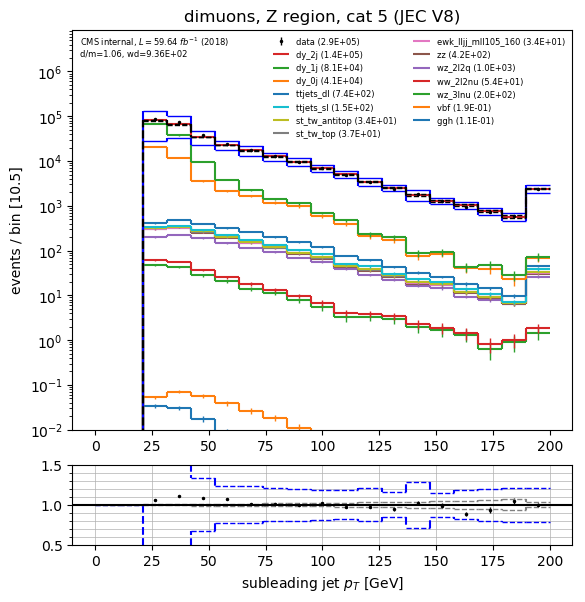

In [312]:
var = "hist__dimuon_invmass_z_peak_cat5__subleadingJet_pt"
weight = "nominal"
analysis = "baseline"
outdir = "./plots"

hdata = load_hist(res["data"][analysis][var]["nominal"])
ret = make_pdf_plot((
    res, hdata, mc_samples_combine_Z, analysis,
    var, weight, weight_xs, int_lumi, outdir, "2018")
)

/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide
/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
/Users/joosep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


['hist', 'dimuon_invmass_z_peak_cat5', 'subleadingJet_pt']


<Figure size 288x288 with 0 Axes>

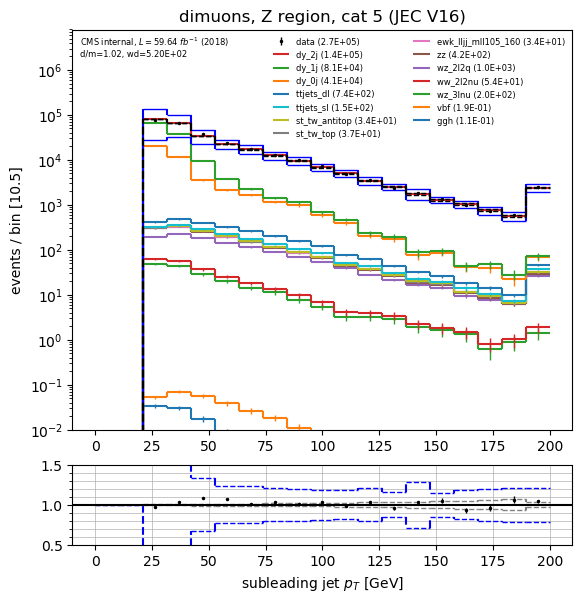

In [313]:
analysis = "redo_jec_V16"

hdata = load_hist(res["data"][analysis][var]["nominal"])
ret = make_pdf_plot((
    res, hdata, mc_samples_combine_Z, analysis,
    var, weight, weight_xs, int_lumi, outdir, "2018"))